## Linear Programming

## Example 1: Optimize conversion funnel

In [1]:
import pulp

# Define the problem
problem = pulp.LpProblem("User_Journey_Optimization", pulp.LpMaximize)

# Define variables
x1 = pulp.LpVariable('Homepage_Resources', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('ProductPages_Resources', lowBound=0, cat='Continuous')
x3 = pulp.LpVariable('ShoppingCart_Resources', lowBound=0, cat='Continuous')
x4 = pulp.LpVariable('Checkout_Resources', lowBound=0, cat='Continuous')

# Define coefficients
user_satisfaction = [0.8, 0.6, 0.7, 0.9]  # Satisfaction scores for Homepage, Product Pages, Shopping Cart, Checkout
costs = [0.5, 0.4, 0.3, 0.6]  # Costs for Homepage, Product Pages, Shopping Cart, Checkout

# Define weights for the objective function
w1 = 0.4  # Weight for user satisfaction
w2 = 0.6  # Weight for cost

# Define the objective function
objective = pulp.lpSum([w1 * user_satisfaction[i] * x + w2 * -costs[i] * x for i, x in enumerate([x1, x2, x3, x4])])
problem += objective, "Maximize User Satisfaction and Minimize Costs"

# Define the resource constraint
total_resources = 100  # Example total resources
problem += x1 + x2 + x3 + x4 <= total_resources, "Total Resource Constraint"

# Define touchpoint-specific constraints
min_resources = [10, 15, 5, 20]
max_resources = [40, 35, 25, 30]

for i, x in enumerate([x1, x2, x3, x4]):
    problem += x >= min_resources[i], f"Min Resource Constraint for {i}"
    problem += x <= max_resources[i], f"Max Resource Constraint for {i}"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Resource Allocation:")
print(f"Homepage: {x1.varValue}")
print(f"Product Pages: {x2.varValue}")
print(f"Shopping Cart: {x3.varValue}")
print(f"Checkout: {x4.varValue}")
print("Total User Satisfaction and Cost:", pulp.value(problem.objective))


Status: Optimal
Optimal Resource Allocation:
Homepage: 40.0
Product Pages: 15.0
Shopping Cart: 25.0
Checkout: 20.0
Total User Satisfaction and Cost: 3.3000000000000034


## Example 2: Resource allocations and cost contributions

C:\Users\jwill\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jwill\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\jwill\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Status: Optimal
Optimal Resource Allocation:
Homepage: 40.0
Product Pages: 15.0
Shopping Cart: 25.0
Checkout: 20.0
Total User Satisfaction and Cost: 3.3000000000000034


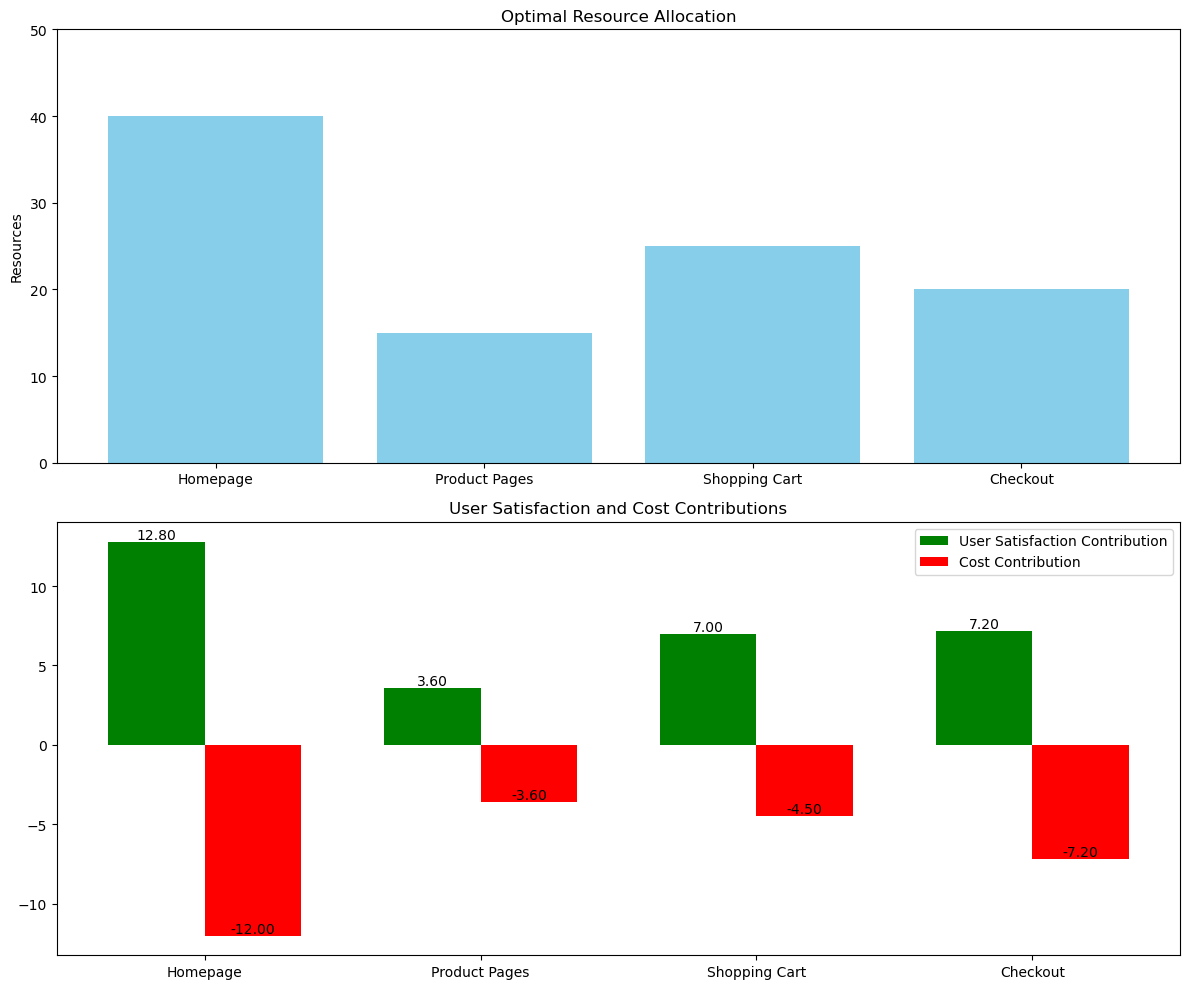

In [2]:
import pulp
import matplotlib.pyplot as plt
import numpy as np

# Define the problem
problem = pulp.LpProblem("User_Journey_Optimization", pulp.LpMaximize)

# Define variables
x1 = pulp.LpVariable('Homepage_Resources', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('ProductPages_Resources', lowBound=0, cat='Continuous')
x3 = pulp.LpVariable('ShoppingCart_Resources', lowBound=0, cat='Continuous')
x4 = pulp.LpVariable('Checkout_Resources', lowBound=0, cat='Continuous')

# Define coefficients
user_satisfaction = [0.8, 0.6, 0.7, 0.9]  # Satisfaction scores for Homepage, Product Pages, Shopping Cart, Checkout
costs = [0.5, 0.4, 0.3, 0.6]  # Costs for Homepage, Product Pages, Shopping Cart, Checkout

# Define weights for the objective function
w1 = 0.4  # Weight for user satisfaction
w2 = 0.6  # Weight for cost

# Define the objective function
objective = pulp.lpSum([w1 * user_satisfaction[i] * x + w2 * -costs[i] * x for i, x in enumerate([x1, x2, x3, x4])])
problem += objective, "Maximize User Satisfaction and Minimize Costs"

# Define the resource constraint
total_resources = 100  # Example total resources
problem += x1 + x2 + x3 + x4 <= total_resources, "Total Resource Constraint"

# Define touchpoint-specific constraints
min_resources = [10, 15, 5, 20]
max_resources = [40, 35, 25, 30]

for i, x in enumerate([x1, x2, x3, x4]):
    problem += x >= min_resources[i], f"Min Resource Constraint for {i}"
    problem += x <= max_resources[i], f"Max Resource Constraint for {i}"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Resource Allocation:")
allocations = [x1.varValue, x2.varValue, x3.varValue, x4.varValue]
touchpoints = ['Homepage', 'Product Pages', 'Shopping Cart', 'Checkout']
for tp, alloc in zip(touchpoints, allocations):
    print(f"{tp}: {alloc}")
print("Total User Satisfaction and Cost:", pulp.value(problem.objective))

# Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for resource allocation
ax[0].bar(touchpoints, allocations, color='skyblue')
ax[0].set_title('Optimal Resource Allocation')
ax[0].set_ylabel('Resources')
ax[0].set_ylim(0, max(max_resources) + 10)

# Plot for user satisfaction and costs
index = np.arange(len(touchpoints))
bar_width = 0.35

satisfaction_contrib = [w1 * user_satisfaction[i] * alloc for i, alloc in enumerate(allocations)]
cost_contrib = [w2 * -costs[i] * alloc for i, alloc in enumerate(allocations)]

rects1 = ax[1].bar(index, satisfaction_contrib, bar_width, label='User Satisfaction Contribution', color='green')
rects2 = ax[1].bar(index + bar_width, cost_contrib, bar_width, label='Cost Contribution', color='red')

ax[1].set_title('User Satisfaction and Cost Contributions')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(touchpoints)
ax[1].legend()

# Add labels
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

add_labels(rects1, ax[1])
add_labels(rects2, ax[1])

plt.tight_layout()
plt.show()


## Example 3: Optimization for two touchpoints

Status: Optimal
Optimal Resource Allocation:
Touchpoint 1: 40.0
Touchpoint 2: 15.0
Total User Satisfaction and Cost: 0.8000000000000029


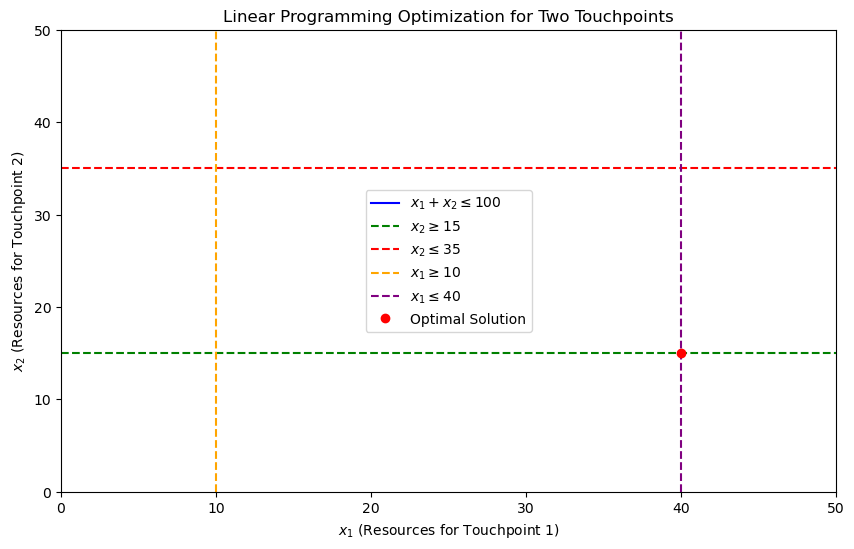

In [3]:
import pulp
import numpy as np
import matplotlib.pyplot as plt

# Define the problem
problem = pulp.LpProblem("User_Journey_Optimization", pulp.LpMaximize)

# Define variables for two touchpoints
x1 = pulp.LpVariable('Touchpoint1_Resources', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('Touchpoint2_Resources', lowBound=0, cat='Continuous')

# Define coefficients for user satisfaction and costs
user_satisfaction = [0.8, 0.6]  # Satisfaction scores for Touchpoint 1 and Touchpoint 2
costs = [0.5, 0.4]  # Costs for Touchpoint 1 and Touchpoint 2

# Define weights for the objective function
w1 = 0.4  # Weight for user satisfaction
w2 = 0.6  # Weight for cost

# Define the objective function
objective = w1 * user_satisfaction[0] * x1 + w1 * user_satisfaction[1] * x2 - w2 * costs[0] * x1 - w2 * costs[1] * x2
problem += objective, "Maximize User Satisfaction and Minimize Costs"

# Define the resource constraint
total_resources = 100  # Example total resources
problem += x1 + x2 <= total_resources, "Total Resource Constraint"

# Define touchpoint-specific constraints
min_resources = [10, 15]
max_resources = [40, 35]

problem += x1 >= min_resources[0], "Min Resource Constraint for Touchpoint 1"
problem += x1 <= max_resources[0], "Max Resource Constraint for Touchpoint 1"
problem += x2 >= min_resources[1], "Min Resource Constraint for Touchpoint 2"
problem += x2 <= max_resources[1], "Max Resource Constraint for Touchpoint 2"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Resource Allocation:")
print(f"Touchpoint 1: {x1.varValue}")
print(f"Touchpoint 2: {x2.varValue}")
print("Total User Satisfaction and Cost:", pulp.value(problem.objective))

# Visualization
x = np.linspace(0, 50, 400)
y1 = total_resources - x  # Total resource constraint
y2 = np.full_like(x, min_resources[1])  # Min resource constraint for Touchpoint 2
y3 = np.full_like(x, max_resources[1])  # Max resource constraint for Touchpoint 2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the constraints
ax.plot(x, y1, label=r'$x_1 + x_2 \leq 100$', color='blue')
ax.axhline(y=min_resources[1], color='green', linestyle='--', label=r'$x_2 \geq 15$')
ax.axhline(y=max_resources[1], color='red', linestyle='--', label=r'$x_2 \leq 35$')
ax.axvline(x=min_resources[0], color='orange', linestyle='--', label=r'$x_1 \geq 10$')
ax.axvline(x=max_resources[0], color='purple', linestyle='--', label=r'$x_1 \leq 40$')

# Fill the feasible region
plt.fill_between(x, 0, y1, where=(x >= min_resources[0]) & (x <= max_resources[0]) & (y1 >= min_resources[1]) & (y1 <= max_resources[1]), color='gray', alpha=0.2)

# Plot the optimal point
optimal_x1 = x1.varValue
optimal_x2 = x2.varValue
ax.plot(optimal_x1, optimal_x2, 'ro', label='Optimal Solution')

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.set_xlabel(r'$x_1$ (Resources for Touchpoint 1)')
ax.set_ylabel(r'$x_2$ (Resources for Touchpoint 2)')
ax.set_title('Linear Programming Optimization for Two Touchpoints')
ax.legend()

plt.show()


## Example 4: Optimization with three touchpoints

Status: Optimal
Optimal Resource Allocation:
Touchpoint 1: 40.0
Touchpoint 2: 15.0
Touchpoint 3: 30.0
Total User Satisfaction and Cost: 3.800000000000002


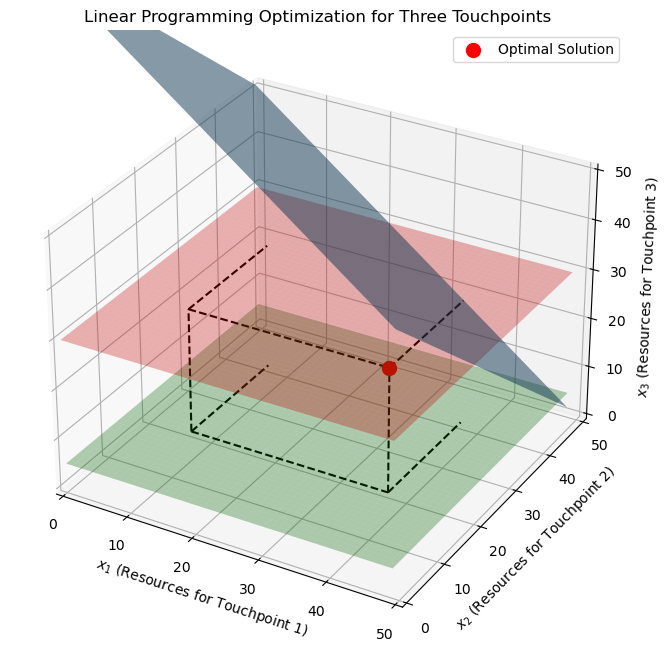

In [4]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the problem
problem = pulp.LpProblem("User_Journey_Optimization", pulp.LpMaximize)

# Define variables for three touchpoints
x1 = pulp.LpVariable('Touchpoint1_Resources', lowBound=0, cat='Continuous')
x2 = pulp.LpVariable('Touchpoint2_Resources', lowBound=0, cat='Continuous')
x3 = pulp.LpVariable('Touchpoint3_Resources', lowBound=0, cat='Continuous')

# Define coefficients for user satisfaction and costs
user_satisfaction = [0.8, 0.6, 0.7]  # Satisfaction scores for Touchpoint 1, 2, and 3
costs = [0.5, 0.4, 0.3]  # Costs for Touchpoint 1, 2, and 3

# Define weights for the objective function
w1 = 0.4  # Weight for user satisfaction
w2 = 0.6  # Weight for cost

# Define the objective function
objective = (
    w1 * user_satisfaction[0] * x1 + w1 * user_satisfaction[1] * x2 + w1 * user_satisfaction[2] * x3 -
    w2 * costs[0] * x1 - w2 * costs[1] * x2 - w2 * costs[2] * x3
)
problem += objective, "Maximize User Satisfaction and Minimize Costs"

# Define the resource constraint
total_resources = 100  # Example total resources
problem += x1 + x2 + x3 <= total_resources, "Total Resource Constraint"

# Define touchpoint-specific constraints
min_resources = [10, 15, 5]
max_resources = [40, 35, 30]

problem += x1 >= min_resources[0], "Min Resource Constraint for Touchpoint 1"
problem += x1 <= max_resources[0], "Max Resource Constraint for Touchpoint 1"
problem += x2 >= min_resources[1], "Min Resource Constraint for Touchpoint 2"
problem += x2 <= max_resources[1], "Max Resource Constraint for Touchpoint 2"
problem += x3 >= min_resources[2], "Min Resource Constraint for Touchpoint 3"
problem += x3 <= max_resources[2], "Max Resource Constraint for Touchpoint 3"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Resource Allocation:")
print(f"Touchpoint 1: {x1.varValue}")
print(f"Touchpoint 2: {x2.varValue}")
print(f"Touchpoint 3: {x3.varValue}")
print("Total User Satisfaction and Cost:", pulp.value(problem.objective))

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define planes for constraints
xx, yy = np.meshgrid(range(50), range(50))
zz1 = total_resources - xx - yy
zz2 = np.full_like(xx, min_resources[2])
zz3 = np.full_like(xx, max_resources[2])

# Plot the constraints
ax.plot_surface(xx, yy, zz1, alpha=0.5, rstride=100, cstride=100)
ax.plot_surface(xx, yy, zz2, color='green', alpha=0.3)
ax.plot_surface(xx, yy, zz3, color='red', alpha=0.3)

# Highlight the feasible region with lines
ax.plot([min_resources[0], min_resources[0]], [min_resources[1], min_resources[1]], [min_resources[2], max_resources[2]], 'k--')
ax.plot([max_resources[0], max_resources[0]], [min_resources[1], min_resources[1]], [min_resources[2], max_resources[2]], 'k--')
ax.plot([min_resources[0], max_resources[0]], [min_resources[1], min_resources[1]], [min_resources[2], min_resources[2]], 'k--')
ax.plot([min_resources[0], max_resources[0]], [min_resources[1], min_resources[1]], [max_resources[2], max_resources[2]], 'k--')
ax.plot([min_resources[0], min_resources[0]], [min_resources[1], max_resources[1]], [min_resources[2], min_resources[2]], 'k--')
ax.plot([max_resources[0], max_resources[0]], [min_resources[1], max_resources[1]], [min_resources[2], min_resources[2]], 'k--')
ax.plot([min_resources[0], min_resources[0]], [min_resources[1], max_resources[1]], [max_resources[2], max_resources[2]], 'k--')
ax.plot([max_resources[0], max_resources[0]], [min_resources[1], max_resources[1]], [max_resources[2], max_resources[2]], 'k--')

# Plot the optimal point
optimal_x1 = x1.varValue
optimal_x2 = x2.varValue
optimal_x3 = x3.varValue
ax.scatter(optimal_x1, optimal_x2, optimal_x3, color='red', s=100, label='Optimal Solution')

ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
ax.set_zlim(0, 50)
ax.set_xlabel(r'$x_1$ (Resources for Touchpoint 1)')
ax.set_ylabel(r'$x_2$ (Resources for Touchpoint 2)')
ax.set_zlabel(r'$x_3$ (Resources for Touchpoint 3)')
ax.set_title('Linear Programming Optimization for Three Touchpoints')
ax.legend()

plt.show()


## Example 5: Market Mix with constant variables

In [5]:
import pulp

# Define the problem
problem = pulp.LpProblem("Marketing_Mix_Optimization", pulp.LpMaximize)

# Define variables for budget allocation across channels
channels = ['TV', 'Online', 'Print', 'SocialMedia']
channel_budgets = {channel: pulp.LpVariable(f'Budget_{channel}', lowBound=0, cat='Continuous') for channel in channels}

# Define expected ROI for each channel (per unit budget)
expected_roi = {
    'TV': 0.5,
    'Online': 0.7,
    'Print': 0.3,
    'SocialMedia': 0.8
}

# Define total marketing budget
total_budget = 100000  # Example total budget

# Define the objective function to maximize ROI
problem += pulp.lpSum(expected_roi[channel] * channel_budgets[channel] for channel in channels), "Maximize ROI"

# Define the budget constraint
problem += pulp.lpSum(channel_budgets[channel] for channel in channels) <= total_budget, "Total Budget Constraint"

# Solve the problem
problem.solve()

# Print the results
print("Status:", pulp.LpStatus[problem.status])
print("Optimal Budget Allocation:")
for channel in channels:
    print(f"{channel}: ${channel_budgets[channel].varValue:.2f}")
print("Total Expected ROI:", pulp.value(problem.objective))


Status: Optimal
Optimal Budget Allocation:
TV: $0.00
Online: $0.00
Print: $0.00
SocialMedia: $100000.00
Total Expected ROI: 80000.0


## Non-linear Programming (NLP)
Non-linear programming can handle diminishing returns by directly optimizing non-linear objective functions.

## Example 1: Dynamic Marketing Mix Optimization

In [10]:
from scipy.optimize import minimize
import numpy as np

# Define the objective function for expected ROI with diminishing returns
def objective(x):
    tv, online, print_, social_media = x
    return -(0.5 * (1 - 0.01 * tv) * tv +
             0.7 * (1 - 0.02 * online) * online +
             0.3 * (1 - 0.01 * print_) * print_ +
             0.8 * (1 - 0.03 * social_media) * social_media)

# Define the constraint: total budget must not exceed 100,000
def constraint(x):
    return 100000 - sum(x)

# Initial guesses
x0 = [25000, 25000, 25000, 25000]

# Bounds for each variable
bnds = ((0, None), (0, None), (0, None), (0, None))

# Constraints in a format that minimize() can handle
constr = {'type': 'ineq', 'fun': constraint}

# Solve the problem
solution = minimize(objective, x0, bounds=bnds, constraints=constr)
tv, online, print_, social_media = solution.x

print(f"Optimal Budget Allocation:")
print(f"TV: ${tv:.2f}")
print(f"Online: ${online:.2f}")
print(f"Print: ${print_:.2f}")
print(f"Social Media: ${social_media:.2f}")
print(f"Total Expected ROI: ${-solution.fun:.2f}")


Optimal Budget Allocation:
TV: $50.00
Online: $25.00
Print: $50.00
Social Media: $16.67
Total Expected ROI: $35.42


## Example 2: Sales Territory Optimization
Simulated Annealing
Simulated annealing can explore a large solution space and find near-optimal solutions for complex problems.

In [12]:
from scipy.optimize import dual_annealing

# Define the objective function for expected sales with diminishing returns
def objective(x):
    territory_a, territory_b, territory_c, territory_d = x
    return -(0.6 * (1 - 0.01 * territory_a) * territory_a +
             0.8 * (1 - 0.02 * territory_b) * territory_b +
             0.5 * (1 - 0.015 * territory_c) * territory_c +
             0.7 * (1 - 0.025 * territory_d) * territory_d)

# Define the constraint: total teams must not exceed 100
def constraint(x):
    return 100 - sum(x)

# Bounds for each variable
bounds = [(0, 100)] * 4

# Solve the problem using dual annealing
result = dual_annealing(objective, bounds)
territory_a, territory_b, territory_c, territory_d = result.x

print(f"Optimal Team Allocation:")
print(f"Territory A: {territory_a:.2f} teams")
print(f"Territory B: {territory_b:.2f} teams")
print(f"Territory C: {territory_c:.2f} teams")
print(f"Territory D: {territory_d:.2f} teams")
print(f"Total Expected Sales: ${-result.fun:.2f}")


Optimal Team Allocation:
Territory A: 50.00 teams
Territory B: 25.00 teams
Territory C: 33.34 teams
Territory D: 20.00 teams
Total Expected Sales: $40.33


## Example 3: Customer Segmentation and Targeting with Dynamic Constraints
Genetic Algorithm
Genetic algorithms can handle complex and dynamic constraints by mimicking the process of natural selection.


### Objective Function:

The objective function calculates the expected profit with diminishing returns for each segment.

### Constraint:

The constraint function ensures the total budget does not exceed 100,000.

### DEAP Setup:

Define fitness and individual classes.
Register attributes, individuals, population, evaluation, crossover, mutation, and selection functions.
Use the DeltaPenalty decorator to handle the constraint.

### Genetic Algorithm Execution:

Create an initial population.
Run the genetic algorithm using eaSimple.
Extract and print the best individual.

This setup uses DEAP to handle the genetic algorithm, providing a flexible and robust solution for customer segmentation and targeting with dynamic constraints.

In [14]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# Define the objective function for expected profit with diminishing returns
def objective(individual):
    segment_a, segment_b, segment_c, segment_d = individual
    return -(0.6 * (1 - 0.01 * segment_a) * segment_a +
             0.8 * (1 - 0.02 * segment_b) * segment_b +
             0.5 * (1 - 0.015 * segment_c) * segment_c +
             0.7 * (1 - 0.025 * segment_d) * segment_d),

# Define the constraint: total budget must not exceed 100,000
def constraint(individual):
    return sum(individual) <= 100000

# Create the fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Register the functions
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 100000)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register the evaluation, crossover, mutation, and selection functions
toolbox.register("evaluate", objective)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=0, up=100000, eta=1.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define the constraint decorator
def feasible(individual):
    return constraint(individual)

toolbox.decorate("evaluate", tools.DeltaPenalty(feasible, 1000000))

# Create the population
population = toolbox.population(n=100)

# Run the genetic algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, verbose=True)

# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]

# Print the results
segment_a, segment_b, segment_c, segment_d = best_individual
print(f"Optimal Budget Allocation:")
print(f"Segment A: ${segment_a:.2f}")
print(f"Segment B: ${segment_b:.2f}")
print(f"Segment C: ${segment_c:.2f}")
print(f"Segment D: ${segment_d:.2f}")
print(f"Total Expected Profit: ${-objective(best_individual)[0]:.2f}")


gen	nevals
0  	100   
1  	60    
2  	60    
3  	47    
4  	65    
5  	54    
6  	56    
7  	60    
8  	64    
9  	66    
10 	65    
11 	58    
12 	59    
13 	50    
14 	58    
15 	60    
16 	63    
17 	55    
18 	66    
19 	66    
20 	67    
21 	67    
22 	66    
23 	58    
24 	55    
25 	64    
26 	50    
27 	58    
28 	63    
29 	57    
30 	59    
31 	62    
32 	60    
33 	69    
34 	63    
35 	48    
36 	56    
37 	58    
38 	54    
39 	53    
40 	56    
41 	54    
42 	71    
43 	60    
44 	47    
45 	66    
46 	67    
47 	54    
48 	44    
49 	57    
50 	60    
51 	59    
52 	48    
53 	66    
54 	73    
55 	57    
56 	60    
57 	71    
58 	65    
59 	60    
60 	56    
61 	61    
62 	61    
63 	68    
64 	65    
65 	48    
66 	53    
67 	61    
68 	62    
69 	72    
70 	53    
71 	61    
72 	57    
73 	70    
74 	70    
75 	50    
76 	64    
77 	66    
78 	69    
79 	54    
80 	70    
81 	70    
82 	62    
83 	68    
84 	59    
85 	59    
86 	56    
87 	62    
88 	57    
89 	64    

C:\Users\jwill\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\jwill\anaconda3\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
